In [2]:
#read data
d1=read.table("student-mat.csv",sep=",",header=TRUE)
d2=read.table("student-por.csv",sep=",",header=TRUE)

In [4]:
library(ggplot2)
library(randomForest)
library(caret)
library(dplyr)
library(MASS)
library(nnet)

Warning message:
"package 'ggplot2' was built under R version 3.5.2"Warning message:
"package 'randomForest' was built under R version 3.5.2"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

Warning message:
"package 'caret' was built under R version 3.5.2"Loading required package: lattice
Warning message:
"package 'dplyr' was built under R version 3.5.2"
Attaching package: 'dplyr'

The following object is masked from 'package:randomForest':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



In [5]:
nzv <- nearZeroVar(d1, saveMetrics= TRUE)
# number of predictors with near zero variance
nzv %>% filter(nzv == TRUE) %>% nrow()

Warning message:
"package 'bindrcpp' was built under R version 3.5.2"

[1] 0

In [8]:
#missing data
nrow(d1) - sum(complete.cases(d1))

[1] 0

In [9]:
#we will apply random Forest algorithm to see what happens on walc and dalc attribute
#dividing into train and test
train <- sample(1:nrow(d1),size = ceiling(0.8*nrow(d1)),replace = FALSE)
d1.train <- d1[train,]
d1.test <- d1[-train,]

In [11]:
str(d1.train)

'data.frame':	316 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 2 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 2 1 2 2 2 2 2 2 1 ...
 $ age       : int  18 18 16 17 18 15 18 18 17 17 ...
 $ address   : Factor w/ 2 levels "R","U": 2 1 2 2 2 2 2 2 1 1 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 2 1 2 2 1 1 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 2 2 2 1 2 2 2 2 2 2 ...
 $ Medu      : int  3 3 2 4 2 2 2 2 1 4 ...
 $ Fedu      : int  3 3 2 1 1 3 2 1 2 3 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 4 3 3 4 1 3 3 3 3 5 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 4 4 3 3 3 3 4 3 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 3 1 2 2 1 2 4 2 4 4 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 2 2 2 2 2 1 2 2 2 ...
 $ traveltime: int  2 1 1 2 4 1 1 1 1 2 ...
 $ studytime : int  2 2 2 1 2 3 2 2 1 3 ...
 $ failures  : int  0 1 0 0 0 0 1 0 0 0 ...
 $ schoolsup : Factor w/

In [12]:
#walc and dalc considered as categorical attribute
d1.train$Walc <- as.factor(d1.train$Walc)
d1.train$Dalc <- as.factor(d1.train$Dalc)
d1.test$Walc <- as.factor(d1.test$Walc)
d1.test$Dalc <- as.factor(d1.test$Dalc)

In [13]:
str(d1.train)

'data.frame':	316 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 2 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 2 1 2 2 2 2 2 2 1 ...
 $ age       : int  18 18 16 17 18 15 18 18 17 17 ...
 $ address   : Factor w/ 2 levels "R","U": 2 1 2 2 2 2 2 2 1 1 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 2 1 2 2 1 1 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 2 2 2 1 2 2 2 2 2 2 ...
 $ Medu      : int  3 3 2 4 2 2 2 2 1 4 ...
 $ Fedu      : int  3 3 2 1 1 3 2 1 2 3 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 4 3 3 4 1 3 3 3 3 5 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 4 4 3 3 3 3 4 3 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 3 1 2 2 1 2 4 2 4 4 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 2 2 2 2 2 1 2 2 2 ...
 $ traveltime: int  2 1 1 2 4 1 1 1 1 2 ...
 $ studytime : int  2 2 2 1 2 3 2 2 1 3 ...
 $ failures  : int  0 1 0 0 0 0 1 0 0 0 ...
 $ schoolsup : Factor w/

In [15]:
mtry <- sqrt(ncol(d1.train))
ntree <- 1000
rf <- randomForest(Walc~.,data = d1.train,mtry=mtry,ntree=ntree)

In [17]:
rf


Call:
 randomForest(formula = Walc ~ ., data = d1.train, mtry = mtry,      ntree = ntree) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 6

        OOB estimate of  error rate: 48.1%
Confusion matrix:
    1 2  3  4 5 class.error
1 123 4  1  1 0  0.04651163
2  46 3 13  3 0  0.95384615
3  30 6 22  4 0  0.64516129
4  10 3  9 12 2  0.66666667
5   4 0  5 11 4  0.83333333

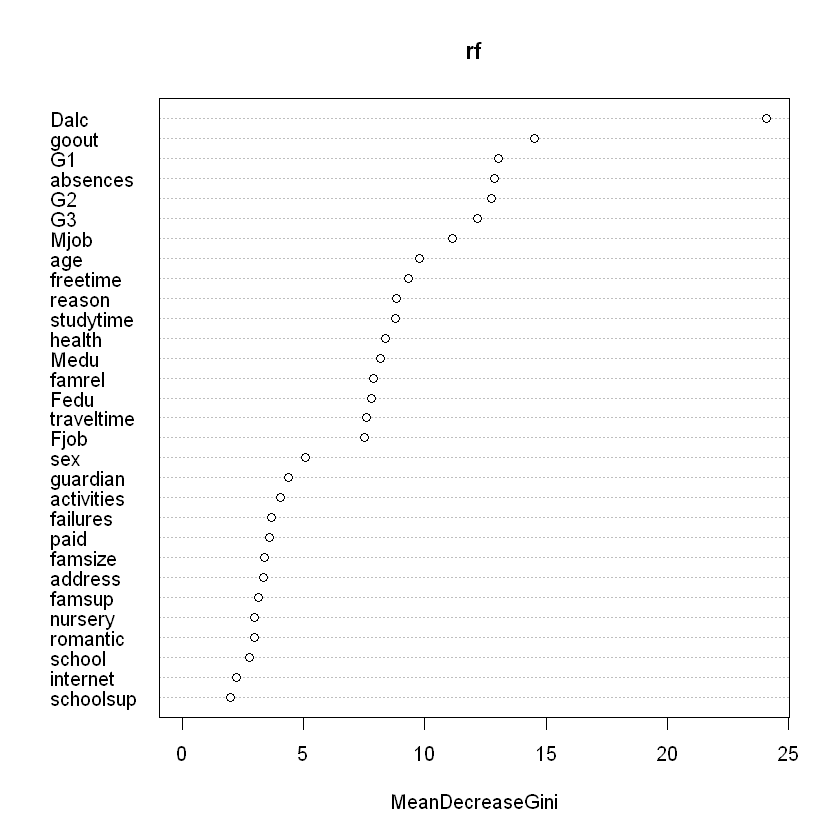

In [18]:
varImpPlot(rf)

In [19]:
#testing on test data
trf <- predict(rf,d1.test)
cmRF <- confusionMatrix(trf,d1.test$Walc)
cmRFAcc <- cmRF$overall['Accuracy']
print(cmRF)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5
         1 21 15  8  3  0
         2  1  2  1  0  0
         3  0  3  9  7  1
         4  0  0  0  4  1
         5  0  0  0  1  2

Overall Statistics
                                          
               Accuracy : 0.481           
                 95% CI : (0.3671, 0.5964)
    No Information Rate : 0.2785          
    P-Value [Acc > NIR] : 0.0001039       
                                          
                  Kappa : 0.3079          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity            0.9545  0.10000   0.5000  0.26667  0.50000
Specificity            0.5439  0.96610   0.8197  0.98438  0.98667
Pos Pred Value         0.4468  0.50000   0.4500  0.80000  0.66667
Neg Pred Value         0.9688  0.76000   0.8475  0.85135  0.97368
Prevalence             0.2785  0.25316   0.2278  0.18987  0.05063
Detectio

In [20]:
#so overal accuracy of random forest is 48% on d1
#we will see same for d2

In [21]:
#we will apply random Forest algorithm to see what happens on walc and dalc attribute
#dividing into train and test
train <- sample(1:nrow(d2),size = ceiling(0.8*nrow(d2)),replace = FALSE)
d2.train <- d2[train,]
d2.test <- d2[-train,]

In [22]:
str(d2)

'data.frame':	649 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [23]:
#walc and dalc considered as categorical attribute
d2.train$Walc <- as.factor(d2.train$Walc)
d2.train$Dalc <- as.factor(d2.train$Dalc)
d2.test$Walc <- as.factor(d2.test$Walc)
d2.test$Dalc <- as.factor(d2.test$Dalc)

In [24]:
str(d2)

'data.frame':	649 obs. of  33 variables:
 $ school    : Factor w/ 2 levels "GP","MS": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address   : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ famsize   : Factor w/ 2 levels "GT3","LE3": 1 1 2 1 1 2 2 1 2 1 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : int  4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu      : int  4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob      : Factor w/ 5 levels "at_home","health",..: 1 1 1 2 3 4 3 3 4 3 ...
 $ Fjob      : Factor w/ 5 levels "at_home","health",..: 5 3 3 4 3 3 3 5 3 3 ...
 $ reason    : Factor w/ 4 levels "course","home",..: 1 1 3 2 2 4 2 2 2 2 ...
 $ guardian  : Factor w/ 3 levels "father","mother",..: 2 1 2 2 1 2 2 2 2 2 ...
 $ traveltime: int  2 1 1 1 1 1 1 2 1 1 ...
 $ studytime : int  2 2 2 3 2 2 2 2 2 2 ...
 $ failures  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ schoolsup : Factor w/

In [25]:
mtry <- sqrt(ncol(d2.train))
ntree <- 1000
rf <- randomForest(Walc~.,data = d2.train,mtry=mtry,ntree=ntree)

In [26]:
rf


Call:
 randomForest(formula = Walc ~ ., data = d2.train, mtry = mtry,      ntree = ntree) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 6

        OOB estimate of  error rate: 53.08%
Confusion matrix:
    1  2  3  4 5 class.error
1 182 13  5  0 0   0.0900000
2  84 11 19  4 1   0.9075630
3  45 11 19 19 1   0.8000000
4  17  3 18 27 5   0.6142857
5   3  5  4 19 5   0.8611111

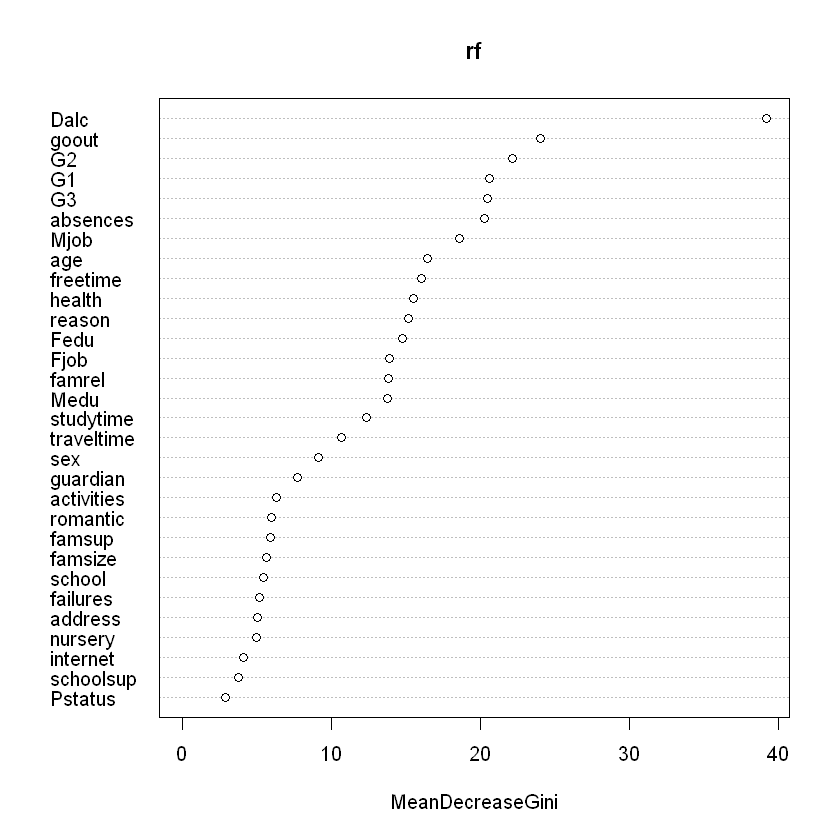

In [27]:
varImpPlot(rf)

In [28]:
#testing on test data
trf <- predict(rf,d2.test)
cmRF <- confusionMatrix(trf,d2.test$Walc)
cmRFAcc <- cmRF$overall['Accuracy']
print(cmRF)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5
         1 45 19 10  9  0
         2  2  7  7  0  1
         3  0  5  6  2  1
         4  0  0  2  5  2
         5  0  0  0  1  5

Overall Statistics
                                          
               Accuracy : 0.5271          
                 95% CI : (0.4374, 0.6156)
    No Information Rate : 0.3643          
    P-Value [Acc > NIR] : 0.0001177       
                                          
                  Kappa : 0.3249          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity            0.9574  0.22581  0.24000  0.29412  0.55556
Specificity            0.5366  0.89796  0.92308  0.96429  0.99167
Pos Pred Value         0.5422  0.41176  0.42857  0.55556  0.83333
Neg Pred Value         0.9565  0.78571  0.83478  0.90000  0.96748
Prevalence             0.3643  0.24031  0.19380  0.13178  0.06977
Detectio

In [29]:
#accuracy increases on dataset d2 it is around 52%